In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')
warnings.filterwarnings("ignore")

#from google.colab import drive
#drive.mount('/content/drive')

In [7]:
# Store csv files in respective variables
file1 = 'data.csv'
file2 = 'spotify_data.csv'

In [2]:
%cd /content/drive/My Drive/

[Errno 2] No such file or directory: '/content/drive/My Drive/'
/Users/Jack1/Downloads


In [8]:
# Read csv files + convert them to respective DataFrames
file_1921_1999_spotify = pd.read_csv(file1)
file_1921_1999_spotify = pd.DataFrame(file_1921_1999_spotify)

file_2000_2023_spotify = pd.read_csv(file2)
file_2000_2023_spotify = pd.DataFrame(file_2000_2023_spotify)

# Data Wrangling

In [9]:
# Fill na values with string value of "other"
file_2000_2023_spotify.fillna(value='other', inplace=True)

In [10]:
# Convert 'duration_ms' field in file_1921_1999_spotify to minutes for readability purposes (ms to minutes)
file_1921_1999_spotify['duration_ms'] = (file_1921_1999_spotify['duration_ms']/ 60000).round(2)

# Rename fields
file_1921_1999_spotify = file_1921_1999_spotify.rename(columns = {'duration_ms':'duration_minutes',
                                                                  'name':'track_name','artists':'artist_name'})

# Drop duplicate columns - file2 field 'release_date'
del file_1921_1999_spotify['release_date']

# Strip brackets and quotes in file1 field 'artists'
file_1921_1999_spotify['artist_name'] = file_1921_1999_spotify['artist_name'].str.strip('[]')
file_1921_1999_spotify['artist_name'] = file_1921_1999_spotify['artist_name'].str.replace("'",'')

# Round float fields so they all show two decimal places
file_1921_1999_spotify[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
                        'speechiness', 'tempo', 'valence']] = file_1921_1999_spotify[['acousticness',
                                                                                      'danceability', 'energy',
                                                                                      'instrumentalness',
                                                                                      'liveness', 'loudness',
                                                                                      'speechiness', 'tempo',
                                                                                      'valence']].round(2)

# Rearrange fields for interpretability purposes
file_1921_1999_spotify = file_1921_1999_spotify[['artist_name', 'track_name', 'duration_minutes', 'id', 'year',
                                                 'popularity', 'explicit', 'mode', 'key', 'acousticness',
                                                 'danceability', 'energy','instrumentalness', 'liveness',
                                                 'loudness', 'speechiness', 'tempo', 'valence']]

In [11]:
# Convert 'duration_ms' field in file_2000_2023_spotify to minutes for readability purposes (ms to minutes)
# + rename field
file_2000_2023_spotify['duration_ms'] = (file_2000_2023_spotify['duration_ms']/ 60000).round(2)
file_2000_2023_spotify = file_2000_2023_spotify.rename(columns = {'duration_ms':'duration_minutes'})

# Drop the first 'Unamed: 0' field and the time_signature' field as it provides no value
del file_2000_2023_spotify['Unnamed: 0']

# Round float fields so they all show two decimal places
file_2000_2023_spotify[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
                  'liveness', 'valence', 'tempo']] = file_2000_2023_spotify[['danceability', 'energy', 'loudness',
                                                                       'speechiness', 'acousticness',
                                                                       'instrumentalness', 'liveness', 'valence',
                                                                       'tempo']].round(2)

# Rearrange fields for interpretability purposes
file_2000_2023_spotify = file_2000_2023_spotify[['artist_name', 'track_name', 'duration_minutes', 'time_signature',
                                                 'track_id', 'year', 'popularity', 'genre', 'mode', 'key',
                                                 'acousticness', 'danceability', 'energy', 'instrumentalness',
                                                 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]

In [12]:
# Show data types of file_1921_1999_spotify dataframe
cat_cols = file_1921_1999_spotify.select_dtypes(include=['object']).columns
num_cols = file_1921_1999_spotify.select_dtypes(include=np.number).columns.tolist()

print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['artist_name', 'track_name', 'id'], dtype='object')
Numerical Variables:
['duration_minutes', 'year', 'popularity', 'explicit', 'mode', 'key', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']


In [13]:
# Show data types of file_2000_2023_spotify dataframe
cat_cols = file_2000_2023_spotify.select_dtypes(include=['object']).columns
num_cols = file_2000_2023_spotify.select_dtypes(include=np.number).columns.tolist()

print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['artist_name', 'track_name', 'track_id', 'genre'], dtype='object')
Numerical Variables:
['duration_minutes', 'time_signature', 'year', 'popularity', 'mode', 'key', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']


In [14]:
# Check the number of unique values for the fields of the file_1921_1999_spotify dataframe
# I will drop categorical features: 'artist_name,' 'explicit,' 'id,' track_name'
# since I will be predicting for popularity and need both dataframes to encompass identical features
file_1921_1999_spotify.nunique()

artist_name          33374
track_name          132940
duration_minutes      1909
id                  169909
year                   100
popularity             100
explicit                 2
mode                     2
key                     12
acousticness           101
danceability            95
energy                 101
instrumentalness       101
liveness               101
loudness              3621
speechiness             97
tempo                14803
valence                101
dtype: int64

In [15]:
# Check the number of unique values for the fields of the file_2000_2023_spotify dataframe
# I will drop categorical features: 'artist_name,' 'genre, 'track_id,' track_name,' 'time_signature'
# since I will be predicting for popularity and need both dataframes to encompass identical features
file_2000_2023_spotify.nunique()

artist_name           64159
track_name           882361
duration_minutes       3545
time_signature            5
track_id            1159764
year                     24
popularity               98
genre                    82
mode                      2
key                      12
acousticness            101
danceability             98
energy                  101
instrumentalness        101
liveness                101
loudness               4794
speechiness              97
tempo                 17065
valence                 101
dtype: int64

In [16]:
# Drop fields that are not needed for modeling - file_1921_1999_spotify dataframe
file_1921_1999_spotify.drop(['artist_name', 'explicit' , 'id', 'track_name'], axis=1, inplace=True)
file_1921_1999_spotify.head()

,duration_minutes,year,popularity,mode,key,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,2.64,1928,0,1,10,1.00,0.71,0.20,0.56,0.15,-12.43,0.05,118.47,0.78
1,4.70,1928,0,1,8,0.99,0.38,0.01,0.90,0.08,-28.45,0.05,83.97,0.08
2,1.74,1928,0,0,5,0.60,0.75,0.22,0.00,0.12,-19.92,0.93,107.18,0.88
3,3.01,1928,0,0,1,1.00,0.78,0.13,0.89,0.11,-14.73,0.09,108.00,0.72
4,11.46,1928,1,1,11,0.99,0.21,0.20,0.91,0.10,-16.83,0.04,62.15,0.07


In [17]:
# Drop fields that are not needed for modeling - file_2000_2023_spotify dataframe
file_2000_2023_spotify.drop(['artist_name', 'genre', 'time_signature', 'track_id', 'track_name'],
                            axis=1, inplace=True)

file_2000_2023_spotify.head()

,duration_minutes,year,popularity,mode,key,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,4.00,2012,68,1,4,0.69,0.48,0.30,0.00,0.12,-10.06,0.04,133.41,0.14
1,3.61,2012,50,1,3,0.48,0.57,0.45,0.00,0.10,-10.29,0.03,140.18,0.52
2,2.65,2012,57,1,3,0.34,0.41,0.23,0.00,0.09,-13.71,0.03,139.83,0.14
3,5.07,2012,58,1,10,0.81,0.39,0.25,0.00,0.08,-9.85,0.04,204.96,0.51
4,4.07,2012,54,0,6,0.07,0.43,0.79,0.02,0.11,-5.42,0.03,171.86,0.22


# Configure Test/Train Splits for Each DataFrame

In [18]:
from sklearn.model_selection import train_test_split

# Configure X, y for file_1921_1999_spotify dataframe
# Split the data into features (X) and target (y)
X = file_1921_1999_spotify.drop('popularity', axis=1)
y = file_1921_1999_spotify['popularity']

# Configure test/train for file_1921_2020_spotify dataframe
# Split the data into training and test sets. 20% testing, 80% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (135927, 13)
Training Labels Shape: (135927,)
Testing Features Shape: (33982, 13)
Testing Labels Shape: (33982,)


In [19]:
# Configure X, y for file_2000_2023_spotify dataframe
# Split the data into features (X) and target (y)
X2 = file_2000_2023_spotify.drop('popularity', axis=1)
y2 = file_2000_2023_spotify['popularity']

# Configure test/train for file_2000_2023_spotify dataframe
# Split the data into training and test sets. 20% testing, 80% training
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

print('Training Features Shape:', X_train2.shape)
print('Training Labels Shape:', y_train2.shape)
print('Testing Features Shape:', X_test2.shape)
print('Testing Labels Shape:', y_test2.shape)

Training Features Shape: (927811, 13)
Training Labels Shape: (927811,)
Testing Features Shape: (231953, 13)
Testing Labels Shape: (231953,)


# Standard Scaler

In [20]:
from sklearn.preprocessing import StandardScaler

# Scale the features for the file_1921_1999_spotify dataframe
scaler = StandardScaler()

# Transform features such that its distribution will have a mean value of 0 and standard deviation of 1.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Show the mean of X_train_scaled. It should have a value of 0.
print('The mean of the scaled X_train variable is:', round(np.mean(X_train_scaled), 4))

# Show the standard deviation of X_train_scaled. It should have a value of 1.
print('The standard deviation of the scaled X_train variable is:', round(np.std(X_train_scaled), 4))

The mean of the scaled X_train variable is: 0.0
The standard deviation of the scaled X_train variable is: 1.0


In [21]:
# Scale the features for the file_2000_2023_spotify dataframe
scaler2 = StandardScaler()

# Transform features such that its distribution will have a mean value of 0 and standard deviation of 1.
X_train_scaled2 = scaler2.fit_transform(X_train2)
X_test_scaled2 = scaler2.transform(X_test2)

# Show the mean of X_train_scaled. It should have a value of 0.
print('The mean of the scaled X_train 2 variable is:', round(np.mean(X_train_scaled2), 4))

# Show the standard deviation of X_train_scaled. It should have a value of 1.
print('The standard deviation of the scaled X_train 2 variable is:', round(np.std(X_train_scaled2), 4))

The mean of the scaled X_train 2 variable is: -0.0
The standard deviation of the scaled X_train 2 variable is: 1.0


# Fitting and Evaluating Models

This is a regression problem that requires supervised learning. For each model tested, I will evaluate Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Percentage Error (MAPE).

For MAE, it is a measure of the average size of the mistakes in a collection of predictions that does not consider direction. It is measured as the average absolute difference between the predicted values and the actual values. The lower the value the better.

For RMSE, it determines the absolute fit of the model to the data. Ideally, I would like a low value as that indicates a better fit and is tied to the accuracy of the model's predictions. It is always larger or equal to MAE. The lower the value the better.

For MAPE, it is the sum of the individual absolute errors divided by the demand (each period separately). It is the average of the percentage errors. The lower the value the better.

For R Squared, it is a measure that determines the proportion of variance in the dependent variable that can be explained by the independent variable. The greater the value the better. Vaguely, 0.65/65% or greater is considered pretty good.

Below are the models that will be tested:
1. Random Forest Regression (model_1)
2. KNN Regression (model_2)
3. Decision Tree Regression (model_3)
4. Linear Regression (model_4)
5. Lasso Regression (model_5)
6. XGB Regression (model_6)

# Modeling

In [22]:
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import GridSearchCV

## RandomForestRegression - Cannot complete due to lack of computing power

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Show all params of model
model_1_1921_1999_2 = RandomForestRegressor()
print(model_1_1921_1999_2.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [ ]:
# RFR for the file_1921_1999_spotify dataframe
model_1_1921_1999 = RandomForestRegressor()

# Tune model_1_1921_1999 to enhance model performance
#hyperParameters_model_1_1921_1999 = {'n_jobs':[1, 5, 10, 50, 100],
                #   'max_depth':[1, 3, 4, 5, 6, 7, 8],
                 #  'min_samples_leaf':[1, 2, 3, 4, 5, 7, 8],
                 #  'min_weight_fraction_leaf':[0.1, 0.2, 0.3, 0.4],
                 #  'max_features':['auto', 'log2', 'sqrt', None],
                  # 'max_leaf_nodes':[None, 10, 30, 50, 70],
                  # 'bootstrap':[True, False],
                  # 'random_state':[0, 42, 100],
                  # 'verbose':[0, 1, 2, 3, 10]}

hyperParameters_model_1_1921_1999 = {'verbose':[0, 1, 2, 3, 10]}

model_1_1921_1999 = GridSearchCV(model_1_1921_1999, param_grid=hyperParameters_model_1_1921_1999,
                                 scoring='neg_mean_squared_error', cv=5)

# Fit model
model_1_1921_1999.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_1_1921_1999 = model_1_1921_1999.predict(X_test)

print('Mean Absolute Error (MAE):', format(metrics.mean_absolute_error(y_test, y_pred_1_1921_1999), '.4f'))
print('Mean Squared Error (MSE):', format(metrics.mean_squared_error(y_test, y_pred_1_1921_1999), '.4f'))
print('Root Mean Squared Error (RMSE):', format(metrics.mean_squared_error(y_test, y_pred_1_1921_1999,
                                                                           squared=False), '.4f'))
print('Mean Absolute Percentage Error (MAPE):', format(metrics.mean_absolute_percentage_error(y_test,
                                                                               y_pred_1_1921_1999), '.4f'))
print('R Squared:', format(metrics.r2_score(y_test, y_pred_1_1921_1999), '.4f'))
print('The best paramters are:', model_1_1921_1999.best_params_)

In [ ]:
# RFR for the file_1921_1999_spotify dataframe
model_1_1921_1999 = RandomForestRegressor()
model_1_1921_1999.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_1_1921_1999 = model_1_1921_1999.predict(X_test)

print('Mean Absolute Error (MAE):', format(metrics.mean_absolute_error(y_test, y_pred_1_1921_1999), '.4f'))
print('Mean Squared Error (MSE):', format(metrics.mean_squared_error(y_test, y_pred_1_1921_1999), '.4f'))
print('Root Mean Squared Error (RMSE):', format(metrics.mean_squared_error(y_test, y_pred_1_1921_1999,
                                                                           squared=False), '.4f'))
print('Mean Absolute Percentage Error (MAPE):', format(metrics.mean_absolute_percentage_error(y_test,
                                                                               y_pred_1_1921_1999), '.4f'))
print('R Squared:', format(metrics.r2_score(y_test, y_pred_1_1921_1999), '.4f'))

In [ ]:
# Tune model_1_1921_1999 to enhance model performance
hyperParameters_model_1_1921_1999 = {'n_jobs':[1, 5, 10, 50, 100],
                   'max_depth':[1, 3, 4, 5, 6, 7, 8],
                   'min_samples_leaf':[1, 2, 3, 4, 5, 7, 8],
                   'min_weight_fraction_leaf':[0.1, 0.2, 0.3, 0.4],
                   'max_features':['auto', 'log2', 'sqrt', None],
                   'max_leaf_nodes':[None, 10, 30, 50, 70],
                   'bootstrap':[True, False],
                   'random_state':[0, 42, 100],
                   'verbose':[0, 1, 2, 3, 10]}

print('The best paramters are:', gridforest.best_params_)

In [ ]:
# Find the best parameters for the model_1_1921_1999
hyperParameters_model_1_1921_1999 = {
    'max_depth': [2, 3, 4, 5, 10, 20, 30, 40],
    'n_estimators': [5, 10, 20, 30, 40, 50, 100]}

gridforest = GridSearchCV(model_1_1921_1999, hyperParameters_model_1_1921_1999, cv=5)
gridforest.fit(X_train, y_train)
print('The best paramters are:', gridforest.best_params_)

In [ ]:
# Gauge feature importances for model_1_1921_1999
features = X.columns

# Get the variables importances, sort them, and print the result
importances = list(model_1_1921_1999.feature_importances_)
features_importances = [(feature, round(importance, 4)) for feature, importance in zip(features, importances)]
features_importances = sorted(features_importances, key = lambda x: x[1], reverse = True)
[print('Feature: {:30} Importance: {}'.format(*pair)) for pair in features_importances];

In [ ]:
# Show the difference between the actual dependent feature vs the predicted dependent feature
sns.distplot(y_test-y_pred_1_1921_1999)

In [ ]:
# RFR for the file_2000_2023_spotify dataframe
model_1_2000_2023 = RandomForestRegressor()
model_1_2000_2023.fit(X_train2, y_train2)

# Predict the response for test dataset
y_pred_1_2000_2023 = model_1_2000_2023.predict(X_test2)

print('Mean Absolute Error (MAE):', format(metrics.mean_absolute_error(y_test2, y_pred_1_2000_2023), '.4f'))
print('Mean Squared Error (MSE):', format(metrics.mean_squared_error(y_test2, y_pred_1_2000_2023), '.4f'))
print('Root Mean Squared Error (RMSE):', format(metrics.mean_squared_error(y_test2, y_pred_1_2000_2023,
                                                                           squared=False), '.4f'))
print('Mean Absolute Percentage Error (MAPE):', format(metrics.mean_absolute_percentage_error(y_test2,
                                                                                y_pred_1_2000_2023), '.4f'))
print('R Squared:', format(metrics.r2_score(y_test2, y_pred_1_2000_2023), '.4f'))

In [ ]:
# Find the best parameters for the model_1_2000_2023
parameters_model_1_2000_2023 = {
    'max_depth': [10, 20, 30, 40],
    'n_estimators': [10, 20, 30, 40, 50, 100]}

gridforest2 = GridSearchCV(model_1_2000_2023, parameters_model_1_2000_2023, cv=5)
gridforest2.fit(X_train2, y_train2)
print('The best paramters are:', gridforest2.best_params_)

In [ ]:
# Gauge feature importances for model_1_2000_2023
features2 = X.columns

# Get the variables importances, sort them, and print the result
importances2 = list(model_1_2000_2023.feature_importances_)
features_importances2 = [(feature, round(importance, 4)) for feature, importance in zip(features2, importances2)]
features_importances2 = sorted(features_importances2, key = lambda x: x[1], reverse = True)
[print('Feature: {:30} Importance: {}'.format(*pair)) for pair in features_importances2];

In [ ]:
# Show the difference between the actual dependent feature vs the predicted dependent feature
sns.distplot(y_test2-y_pred_1_2000_2023)

In [ ]:
# Adjust X_train and X_test shape size as their current shapes differ, so they cannot be graphed.
#X_train_1=np.arange(0,len(X_train),1)
X_train_1_1921_1999 = X_train.iloc[:,0]
X_test_1_1921_1999 = X_test.iloc[:,0]

# Scatter plot for model_1_1921_1999
plt.scatter(X_train_1_1921_1999, y_train, label='Real', color='b', alpha=0.5)
plt.scatter(X_test_1_1921_1999, y_pred_1_1921_1999, label='Predicted', color='r', alpha=0.5)
plt.title('Random Forest Regression Model')
plt.xlabel('X Features')
plt.ylabel('Popularity')
plt.grid(color='#D3D3D3', linestyle='solid')
plt.legend(fontsize=7, loc='upper right')
plt.tight_layout()
plt.show()

In [ ]:
# Adjust X_train and X_test shape size as their current shapes differ, so they cannot be graphed.
X_train_1_2000_2023 = X_train2.iloc[:, 0]
X_test_1_2000_2023 = X_test2.iloc[:, 0]

# Scatter plot for model_1_2000_2023
plt.scatter(X_train_1_2000_2023, y_train2, label='Real', color='b', alpha=0.5)
plt.scatter(X_test_1_2000_2023, y_pred_1_2000_2023, label='Predicted', color='r', alpha=0.5)
plt.title('Random Forest Regression Model')
plt.xlabel('X Features')
plt.ylabel('Popularity')
plt.grid(color='#D3D3D3', linestyle='solid')
plt.legend(fontsize=7, loc='upper right')
plt.tight_layout()
plt.show()

## KNN Regression

In [26]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error

# Show all params of model
model_2_1921_1999_2 = KNeighborsRegressor()
print(model_2_1921_1999_2.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [27]:
# KNN for the file_1921_1999_spotify dataframe
model_2_1921_1999 = KNeighborsRegressor(n_neighbors=37)

# Fit model
model_2_1921_1999.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_2_1921_1999 = model_2_1921_1999.predict(X_test)

print('Mean Absolute Error (MAE):', format(metrics.mean_absolute_error(y_test, y_pred_2_1921_1999), '.4f'))
print('Mean Squared Error (MSE):', format(metrics.mean_squared_error(y_test, y_pred_2_1921_1999), '.4f'))
print('Root Mean Squared Error (RMSE):', format(metrics.mean_squared_error(y_test, y_pred_2_1921_1999,
                                                                           squared=False), '.4f'))
print('Mean Absolute Percentage Error (MAPE):', format(metrics.mean_absolute_percentage_error(y_test,
                                                                               y_pred_2_1921_1999), '.4f'))
print('R Squared:', format(metrics.r2_score(y_test, y_pred_2_1921_1999), '.4f'))

Mean Absolute Error (MAE): 6.7710
Mean Squared Error (MSE): 87.3773
Root Mean Squared Error (RMSE): 9.3476
Mean Absolute Percentage Error (MAPE): 1877512915325639.7500
R Squared: 0.8129


In [28]:
# Find the optimal k value by leveraging RMSE + store RMSE values for varying k values - file_1921_1999_spotify
rmse_value = []
for K in range(38):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors=K)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    error = format(sqrt(mean_squared_error(y_test, prediction)), '.4f')
    rmse_value.append(error)
    print('The RMSE value for k =' , K , 'is:', error)

The RMSE value for k = 1 is: 12.8622
The RMSE value for k = 2 is: 11.1794
The RMSE value for k = 3 is: 10.5170
The RMSE value for k = 4 is: 10.2013
The RMSE value for k = 5 is: 10.0126
The RMSE value for k = 6 is: 9.8731
The RMSE value for k = 7 is: 9.7898
The RMSE value for k = 8 is: 9.7230
The RMSE value for k = 9 is: 9.6690
The RMSE value for k = 10 is: 9.6303
The RMSE value for k = 11 is: 9.5943
The RMSE value for k = 12 is: 9.5601
The RMSE value for k = 13 is: 9.5441
The RMSE value for k = 14 is: 9.5232
The RMSE value for k = 15 is: 9.4992
The RMSE value for k = 16 is: 9.4818
The RMSE value for k = 17 is: 9.4660
The RMSE value for k = 18 is: 9.4582
The RMSE value for k = 19 is: 9.4473
The RMSE value for k = 20 is: 9.4354
The RMSE value for k = 21 is: 9.4245
The RMSE value for k = 22 is: 9.4148
The RMSE value for k = 23 is: 9.4067
The RMSE value for k = 24 is: 9.4007
The RMSE value for k = 25 is: 9.3953
The RMSE value for k = 26 is: 9.3914
The RMSE value for k = 27 is: 9.3879
The R

<Axes: xlabel='popularity', ylabel='Density'>

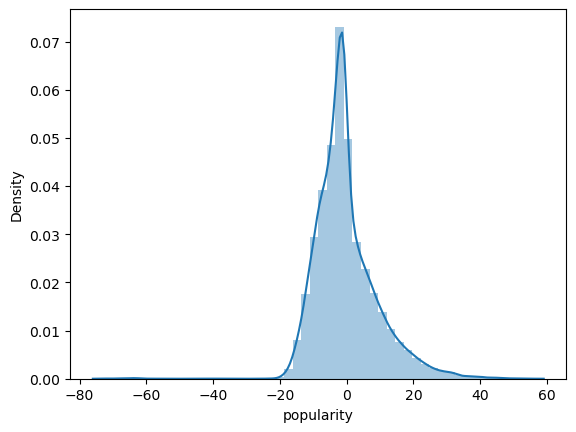

In [29]:
# Show the difference between the actual dependent feature vs the predicted dependent feature
sns.distplot(y_test-y_pred_2_1921_1999)

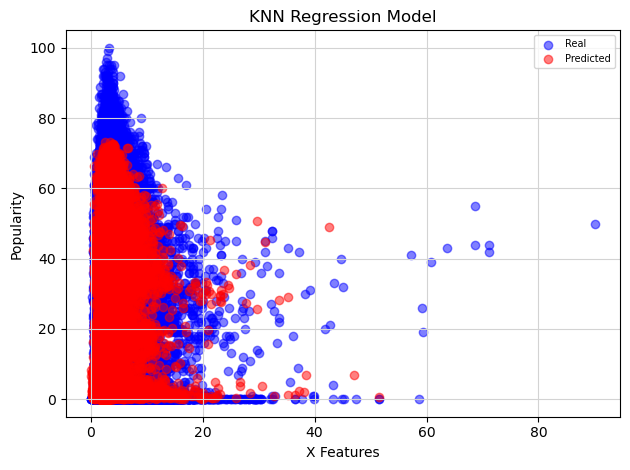

In [30]:
# Adjust X_train and X_test shape size as their current shapes differ, so they cannot be graphed.
#X_train_1=np.arange(0,len(X_train),1)
X_train_2_1921_1999 = X_train.iloc[:,0]
X_test_2_1921_1999 = X_test.iloc[:,0]

# Scatter plot for model_2_1921_1999
plt.scatter(X_train_2_1921_1999, y_train, label='Real', color='b', alpha=0.5)
plt.scatter(X_test_2_1921_1999, y_pred_2_1921_1999, label='Predicted', color='r', alpha=0.5)
plt.title('KNN Regression Model')
plt.xlabel('X Features')
plt.ylabel('Popularity')
plt.grid(color='#D3D3D3', linestyle='solid')
plt.legend(fontsize=7, loc='upper right')
plt.tight_layout()
plt.show()

In [31]:
# KNN for the file_2000_2023_spotify dataframe
model_2_2000_2023 = KNeighborsRegressor(n_neighbors=41)

# Fit model
model_2_2000_2023.fit(X_train2, y_train2)

# Predict the response for test dataset
y_pred_2_2000_2023 = model_2_2000_2023.predict(X_test2)

print('Mean Absolute Error (MAE):', format(metrics.mean_absolute_error(y_test2, y_pred_2_2000_2023), '.4f'))
print('Mean Squared Error (MSE):', format(metrics.mean_squared_error(y_test2, y_pred_2_2000_2023), '.4f'))
print('Root Mean Squared Error (RMSE):', format(metrics.mean_squared_error(y_test2, y_pred_2_2000_2023,
                                                                           squared=False), '.4f'))
print('Mean Absolute Percentage Error (MAPE):', format(metrics.mean_absolute_percentage_error(y_test2,
                                                                                y_pred_2_2000_2023), '.4f'))
print('R Squared:', format(metrics.r2_score(y_test2, y_pred_2_2000_2023), '.4f'))

Mean Absolute Error (MAE): 11.4349
Mean Squared Error (MSE): 203.2997
Root Mean Squared Error (RMSE): 14.2583
Mean Absolute Percentage Error (MAPE): 8958822157789828.0000
R Squared: 0.1937


In [32]:
# Find the optimal k value by leveraging RMSE + store RMSE values for varying k values - file_2000_2023_spotify
rmse_value2 = []
for K in range(42):
    K2 = K+1
    model2 = neighbors.KNeighborsRegressor(n_neighbors=K2)
    model2.fit(X_train2, y_train2)
    prediction2 = model2.predict(X_test2)
    error2 = format(sqrt(mean_squared_error(y_test2, prediction2)), '.4f')
    rmse_value.append(error2)
    print('The RMSE value for k =' , K2 , 'is:', error2)

The RMSE value for k = 1 is: 19.6200
The RMSE value for k = 2 is: 16.9948
The RMSE value for k = 3 is: 16.0191
The RMSE value for k = 4 is: 15.5367
The RMSE value for k = 5 is: 15.2359
The RMSE value for k = 6 is: 15.0326
The RMSE value for k = 7 is: 14.8831
The RMSE value for k = 8 is: 14.7764
The RMSE value for k = 9 is: 14.6954
The RMSE value for k = 10 is: 14.6276
The RMSE value for k = 11 is: 14.5712
The RMSE value for k = 12 is: 14.5253
The RMSE value for k = 13 is: 14.4903
The RMSE value for k = 14 is: 14.4586
The RMSE value for k = 15 is: 14.4349
The RMSE value for k = 16 is: 14.4130
The RMSE value for k = 17 is: 14.3983
The RMSE value for k = 18 is: 14.3789
The RMSE value for k = 19 is: 14.3644
The RMSE value for k = 20 is: 14.3527
The RMSE value for k = 21 is: 14.3406
The RMSE value for k = 22 is: 14.3288
The RMSE value for k = 23 is: 14.3233
The RMSE value for k = 24 is: 14.3140
The RMSE value for k = 25 is: 14.3066
The RMSE value for k = 26 is: 14.3010
The RMSE value for k 

<Axes: xlabel='popularity', ylabel='Density'>

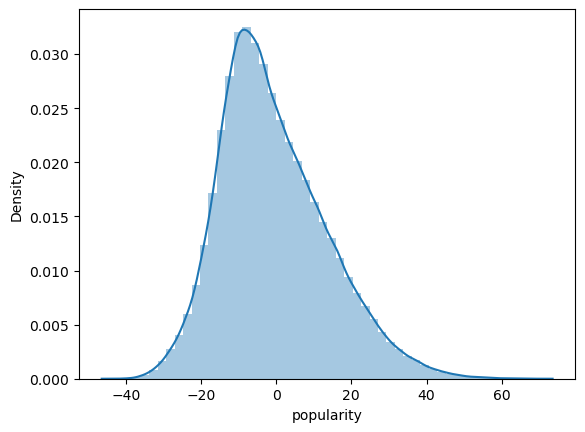

In [33]:
# Show the difference between the actual dependent feature vs the predicted dependent feature
sns.distplot(y_test2-y_pred_2_2000_2023)

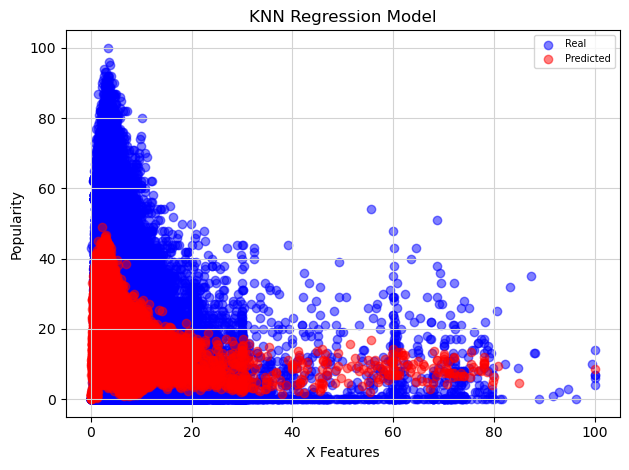

In [34]:
# Adjust X_train and X_test shape size as their current shapes differ, so they cannot be graphed.
X_train_2_2000_2023 = X_train2.iloc[:, 0]
X_test_2_2000_2023 = X_test2.iloc[:, 0]

# Scatter plot for model_2_2000_2023
plt.scatter(X_train_2_2000_2023, y_train2, label='Real', color='b', alpha=0.5)
plt.scatter(X_test_2_2000_2023, y_pred_2_2000_2023, label='Predicted', color='r', alpha=0.5)
plt.title('KNN Regression Model')
plt.xlabel('X Features')
plt.ylabel('Popularity')
plt.grid(color='#D3D3D3', linestyle='solid')
plt.legend(fontsize=7, loc='upper right')
plt.tight_layout()
plt.show()

## Decision Tree Regression

In [39]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import tree
import graphviz

# Show all params of model
model_3_1921_1999_2 = DecisionTreeRegressor()
print(model_3_1921_1999_2.get_params())

{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [40]:
# DTR for file_1921_1999_spotify dataframe
model_3_1921_1999 = DecisionTreeRegressor(max_depth=4, min_samples_leaf=1, min_weight_fraction_leaf=0.1,
                                          max_features=None, max_leaf_nodes=None, splitter='best')

# Tune model_5_1921_1999 to enhance model performance
hyperParameters_model_3_1921_1999 = {'splitter':['best','random'],
                                     'max_depth':[1, 3, 4, 5, 6, 7, 8],
                                     'min_samples_leaf':[1, 2, 3, 4, 5, 7, 8],
                                     'min_weight_fraction_leaf':[0.1, 0.2, 0.3, 0.4],
                                     'max_features':['auto', 'log2', 'sqrt', None],
                                     'max_leaf_nodes':[None, 10, 30, 50, 70]}

model_3_1921_1999 = GridSearchCV(model_3_1921_1999, param_grid=hyperParameters_model_3_1921_1999,
                                 scoring='neg_mean_squared_error', cv=5)

# Fit model
model_3_1921_1999.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_3_1921_1999 = model_3_1921_1999.predict(X_test)

print('Mean Absolute Error (MAE):', format(metrics.mean_absolute_error(y_test, y_pred_3_1921_1999), '.4f'))
print('Mean Squared Error (MSE):', format(metrics.mean_squared_error(y_test, y_pred_3_1921_1999), '.4f'))
print('Root Mean Squared Error (RMSE):', format(metrics.mean_squared_error(y_test, y_pred_3_1921_1999,
                                                                           squared=False), '.4f'))
print('Mean Absolute Percentage Error (MAPE):', format(metrics.mean_absolute_percentage_error(y_test,
                                                                               y_pred_3_1921_1999), '.4f'))
print('R Squared:', format(metrics.r2_score(y_test, y_pred_3_1921_1999), '.4f'))
print('Best param values:', model_3_1921_1999.best_params_)

Mean Absolute Error (MAE): 7.0510
Mean Squared Error (MSE): 92.7071
Root Mean Squared Error (RMSE): 9.6285
Mean Absolute Percentage Error (MAPE): 2025441916744209.0000
R Squared: 0.8015
Best param values: {'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}


In [78]:
# Gauge feature importances for model_3_1921_1999
# Get features list
features_model_3_1921_1999 = X.columns

# Get each feature's importance value
importances_model_3_1921_1999 = list(model_3_1921_1999.feature_importances_)
features_importances_model_3_1921_1999 = [(feature, round(importance, 4)) for feature, importance in 
                                         zip(features_model_3_1921_1999,importances_model_3_1921_1999)]
features_importances3 = sorted(features_importances_model_3_1921_1999, key = lambda x: x[1], reverse = True)
[print('Feature: {:30} Importance: {}'.format(*pair)) for pair in features_importances_model_3_1921_1999]

Feature: duration_minutes               Importance: 0.0
Feature: year                           Importance: 1.0
Feature: mode                           Importance: 0.0
Feature: key                            Importance: 0.0
Feature: acousticness                   Importance: 0.0
Feature: danceability                   Importance: 0.0
Feature: energy                         Importance: 0.0
Feature: instrumentalness               Importance: 0.0
Feature: liveness                       Importance: 0.0
Feature: loudness                       Importance: 0.0
Feature: speechiness                    Importance: 0.0
Feature: tempo                          Importance: 0.0
Feature: valence                        Importance: 0.0


[None, None, None, None, None, None, None, None, None, None, None, None, None]

In [ ]:
# View decision tree + export the decision tree to a tree.dot file to visualize for model_1_1921_1999
dot_data = tree.export_graphviz(model_3_1921_1999, out_file=None, feature_names=['danceability', 'energy',
                                                                                 'loudness', 'speechiness',
                                                                                 'acousticness','instrumentalness',
                                                                                 'liveness', 'valence', 'tempo',
                                                                                'duration_minutes', 'year', 'mode',
                                                                                'key'], filled=True, rounded=True)
graph = graphviz.Source(dot_data, format="png")
graph

<Axes: xlabel='popularity', ylabel='Density'>

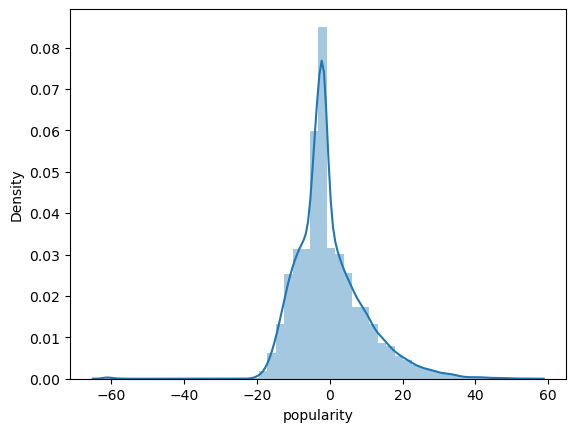

In [43]:
# Show the difference between the actual dependent feature vs the predicted dependent feature
sns.distplot(y_test-y_pred_3_1921_1999)

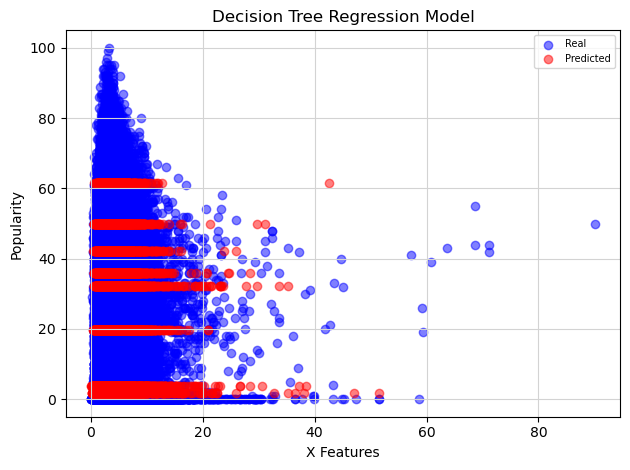

In [44]:
# Adjust X_train and X_test shape size as their current shapes differ, so they cannot be graphed.
#X_train_1=np.arange(0,len(X_train),1)
X_train_3_1921_1999 = X_train.iloc[:,0]
X_test_3_1921_1999 = X_test.iloc[:,0]

# Scatter plot for model_3_1921_1999
plt.scatter(X_train_3_1921_1999, y_train, label='Real', color='b', alpha=0.5)
plt.scatter(X_test_3_1921_1999, y_pred_3_1921_1999, label='Predicted', color='r', alpha=0.5)
plt.title('Decision Tree Regression Model')
plt.xlabel('X Features')
plt.ylabel('Popularity')
plt.grid(color='#D3D3D3', linestyle='solid')
plt.legend(fontsize=7, loc='upper right')
plt.tight_layout()
plt.show()

In [45]:
# DTR for file_2000_2023_spotify dataframe
model_3_2000_2023 = DecisionTreeRegressor()

# Tune model_5_1921_1999 to enhance model performance
hyperParameters_model_5_1921_1999 = {'splitter':['best','random'],
                   'max_depth':[1, 3, 4, 5, 6, 7, 8],
                   'min_samples_leaf':[1, 2, 3, 4, 5, 7, 8],
                   'min_weight_fraction_leaf':[0.1, 0.2, 0.3, 0.4],
                   'max_features':['auto', 'log2', 'sqr', None],
                   'max_leaf_nodes':[None, 10, 30, 50, 70]}
                   # "max_features":[None],
                   # "max_leaf_nodes":[None]}

model_3_2000_2023 = GridSearchCV(model_3_2000_2023, param_grid=hyperParameters_model_5_1921_1999,
                                 scoring='neg_mean_squared_error', cv=5)

# Fit model
model_3_2000_2023.fit(X_train2, y_train2)

# Predict the response for test dataset
y_pred_3_2000_2023 = model_3_2000_2023.predict(X_test2)

print('Mean Absolute Error (MAE):', format(metrics.mean_absolute_error(y_test2, y_pred_3_2000_2023), '.4f'))
print('Mean Squared Error (MSE):', format(metrics.mean_squared_error(y_test2, y_pred_3_2000_2023), '.4f'))
print('Root Mean Squared Error (RMSE):', format(metrics.mean_squared_error(y_test2, y_pred_3_2000_2023,
                                                                           squared=False), '.4f'))
print('Mean Absolute Percentage Error (MAPE):', format(metrics.mean_absolute_percentage_error(y_test2,
                                                                                y_pred_3_2000_2023), '.4f'))
print('R Squared:', format(metrics.r2_score(y_test2, y_pred_3_2000_2023), '.4f'))
print('Best param values:', model_3_2000_2023.best_params_)

KeyboardInterrupt: 

In [ ]:
# Gauge feature importances for model_3_2000_2023
# Get features list
features4 = X.columns

# Get each feature's importance value
importances4 = list(model_3_2000_2023.feature_importances_)
features_importances4 = [(feature, round(importance, 4)) for feature, importance in zip(features4, importances4)]
features_importances4 = sorted(features_importances4, key = lambda x: x[1], reverse = True)
[print('Feature: {:30} Importance: {}'.format(*pair)) for pair in features_importances4]

In [ ]:
# View decision tree + export the decision tree to a tree.dot file to visualize for model_1_2000_2023
dot_data = tree.export_graphviz(model_3_2000_2023, out_file=None, feature_names=['danceability', 'energy',
                                                                                 'loudness', 'speechiness',
                                                                                 'acousticness','instrumentalness',
                                                                                 'liveness', 'valence', 'tempo',
                                                                                'duration_minutes', 'year', 'mode',
                                                                                'key'], filled=True, rounded=True)
graph = graphviz.Source(dot_data, format="png")
graph

In [ ]:
# Show the difference between the actual dependent feature vs the predicted dependent feature
sns.distplot(y_test2-y_pred_3_2000_2023)

In [ ]:
# Adjust X_train and X_test shape size as their current shapes differ, so they cannot be graphed.
X_train_3_2000_2023 = X_train2.iloc[:, 0]
X_test_3_2000_2023 = X_test2.iloc[:, 0]

# Scatter plot for model_3_2000_2023
plt.scatter(X_train_3_2000_2023, y_train2, label='Real', color='b', alpha=0.5)
plt.scatter(X_test_3_2000_2023, y_pred_3_2000_2023, label='Predicted', color='r', alpha=0.5)
plt.title('Decision Tree Regression Model')
plt.xlabel('X Features')
plt.ylabel('Popularity')
plt.grid(color='#D3D3D3', linestyle='solid')
plt.legend(fontsize=7, loc='upper right')
plt.tight_layout()
plt.show()

## Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression

# Show all params of model
model_4_1921_1999_2 = LinearRegression()
print(model_4_1921_1999_2.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [47]:
# LR for file_1921_1999_spotify dataframe
model_4_1921_1999 = LinearRegression()

# Fit model
model_4_1921_1999.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_4_1921_1999 = model_4_1921_1999.predict(X_test)

print('Mean Absolute Error (MAE):', format(metrics.mean_absolute_error(y_test, y_pred_4_1921_1999), '.4f'))
print('Mean Squared Error (MSE):', format(metrics.mean_squared_error(y_test, y_pred_4_1921_1999), '.4f'))
print('Root Mean Squared Error (RMSE):', format(metrics.mean_squared_error(y_test, y_pred_4_1921_1999,
                                                                           squared=False), '.4f'))
print('Mean Absolute Percentage Error (MAPE):', format(metrics.mean_absolute_percentage_error(y_test,
                                                                               y_pred_4_1921_1999), '.4f'))
print('R Squared:', format(metrics.r2_score(y_test, y_pred_4_1921_1999), '.4f'))

Mean Absolute Error (MAE): 7.7086
Mean Squared Error (MSE): 101.7990
Root Mean Squared Error (RMSE): 10.0895
Mean Absolute Percentage Error (MAPE): 4887416424252814.0000
R Squared: 0.7820


In [48]:
# Gauge feature importances for model_4_1921_1999
# Get features list
features5 = X.columns

# Get the each feature's coefficient value
importances5 = list(model_4_1921_1999.coef_)
features_importances5 = [(feature, round(importance, 4)) for feature, importance in zip(features5, importances5)]
features_importances5 = sorted(features_importances5, key = lambda x: x[1], reverse = True)
[print('Feature: {:30} Coefficients: {}'.format(*pair)) for pair in features_importances5];

Feature: danceability                   Coefficients: 4.8528
Feature: year                           Coefficients: 0.6852
Feature: loudness                       Coefficients: 0.0346
Feature: duration_minutes               Coefficients: 0.0061
Feature: tempo                          Coefficients: 0.0053
Feature: key                            Coefficients: -0.0121
Feature: mode                           Coefficients: -0.2658
Feature: valence                        Coefficients: -0.4511
Feature: energy                         Coefficients: -1.2249
Feature: liveness                       Coefficients: -2.4307
Feature: instrumentalness               Coefficients: -2.445
Feature: acousticness                   Coefficients: -4.2056
Feature: speechiness                    Coefficients: -7.306


<Axes: xlabel='popularity', ylabel='Density'>

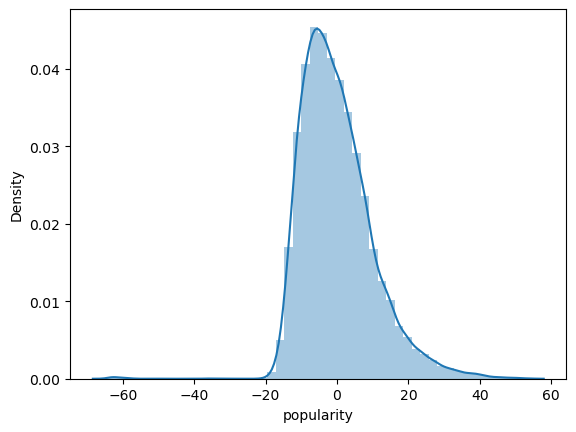

In [49]:
# Show the difference between the actual dependent feature vs the predicted dependent feature
sns.distplot(y_test-y_pred_4_1921_1999)

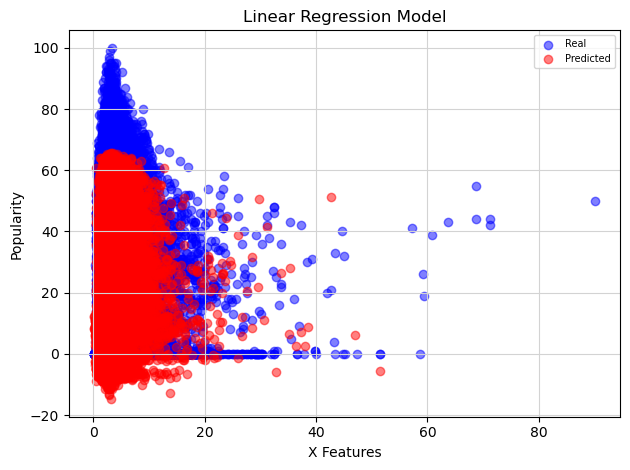

In [50]:
# Adjust X_train and X_test shape size as their current shapes differ, so they cannot be graphed.
#X_train_1=np.arange(0,len(X_train),1)
X_train_4_1921_1999 = X_train.iloc[:,0]
X_test_4_1921_1999 = X_test.iloc[:,0]

# Scatter plot for model_4_1921_1999
plt.scatter(X_train_4_1921_1999, y_train, label='Real', color='b', alpha=0.5)
plt.scatter(X_test_4_1921_1999, y_pred_4_1921_1999, label='Predicted', color='r', alpha=0.5)
plt.title('Linear Regression Model')
plt.xlabel('X Features')
plt.ylabel('Popularity')
plt.grid(color='#D3D3D3', linestyle='solid')
plt.legend(fontsize=7, loc='upper right')
plt.tight_layout()
plt.show()

In [51]:
# LR for file_2000_2023_spotify dataframe
model_4_2000_2023 = LinearRegression()

# Fit model
model_4_2000_2023.fit(X_train2, y_train2)

# Predict the response for test dataset
y_pred_4_2000_2023 = model_4_2000_2023.predict(X_test2)

print('Mean Absolute Error (MAE):', format(metrics.mean_absolute_error(y_test2, y_pred_4_2000_2023), '.4f'))
print('Mean Squared Error (MSE):', format(metrics.mean_squared_error(y_test2, y_pred_4_2000_2023), '.4f'))
print('Root Mean Squared Error (RMSE):', format(metrics.mean_squared_error(y_test2, y_pred_4_2000_2023,
                                                                           squared=False), '.4f'))
print('Mean Absolute Percentage Error (MAPE):', format(metrics.mean_absolute_percentage_error(y_test2,
                                                                                y_pred_4_2000_2023), '.4f'))
print('R Squared:', format(metrics.r2_score(y_test2, y_pred_4_2000_2023), '.4f'))

Mean Absolute Error (MAE): 11.6409
Mean Squared Error (MSE): 208.8842
Root Mean Squared Error (RMSE): 14.4528
Mean Absolute Percentage Error (MAPE): 9375453561387142.0000
R Squared: 0.1715


In [52]:
# Gauge feature importances for model_4_2000_2023
# Get features list
features6 = X.columns

# Get the each feature's coefficient value
importances6 = list(model_4_2000_2023.coef_)
features_importances6 = [(feature, round(importance, 4)) for feature, importance in zip(features6, importances6)]
features_importances6 = sorted(features_importances6, key = lambda x: x[1], reverse = True)
[print('Feature: {:30} Coefficients: {}'.format(*pair)) for pair in features_importances6];

Feature: danceability                   Coefficients: 6.9761
Feature: year                           Coefficients: 0.7609
Feature: loudness                       Coefficients: 0.2427
Feature: tempo                          Coefficients: -0.0028
Feature: key                            Coefficients: -0.0061
Feature: duration_minutes               Coefficients: -0.4866
Feature: mode                           Coefficients: -0.6466
Feature: liveness                       Coefficients: -2.8207
Feature: acousticness                   Coefficients: -3.5633
Feature: speechiness                    Coefficients: -4.914
Feature: valence                        Coefficients: -4.9595
Feature: instrumentalness               Coefficients: -6.5739
Feature: energy                         Coefficients: -7.6285


<Axes: xlabel='popularity', ylabel='Density'>

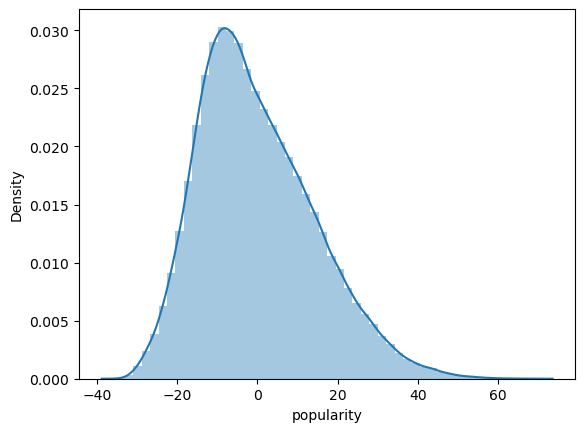

In [53]:
# Show the difference between the actual dependent feature vs the predicted dependent feature
sns.distplot(y_test2-y_pred_4_2000_2023)

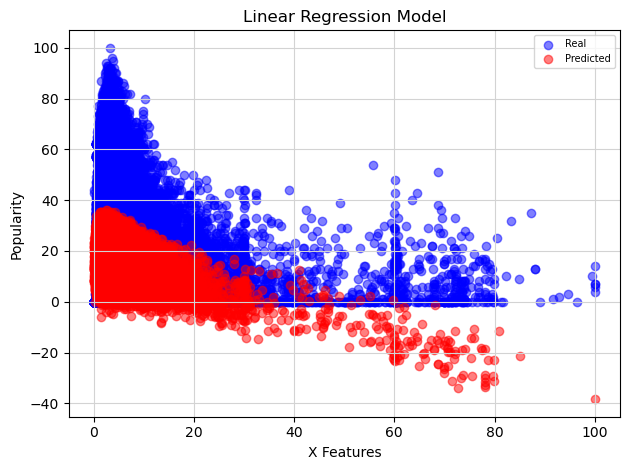

In [54]:
# Adjust X_train and X_test shape size as their current shapes differ, so they cannot be graphed.
X_train_4_2000_2023 = X_train2.iloc[:, 0]
X_test_4_2000_2023 = X_test2.iloc[:, 0]

# Scatter plot for model_4_2000_2023
plt.scatter(X_train_4_2000_2023, y_train2, label='Real', color='b', alpha=0.5)
plt.scatter(X_test_4_2000_2023, y_pred_4_2000_2023, label='Predicted', color='r', alpha=0.5)
plt.title('Linear Regression Model')
plt.xlabel('X Features')
plt.ylabel('Popularity')
plt.grid(color='#D3D3D3', linestyle='solid')
plt.legend(fontsize=7, loc='upper right')
plt.tight_layout()
plt.show()

## Lasso Regression

In [55]:
from sklearn.linear_model import Lasso

# Show all params of model
model_5_1921_1999_2 = Lasso()
print(model_5_1921_1999_2.get_params())

{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}


In [56]:
# Lasso for file_1921_1999_spotify dataframe
model_5_1921_1999 = Lasso(warm_start=True, alpha=1e-05, max_iter=10)

# Tune model_5_1921_1999 to enhance model performance
hyperParameters_model_5_1921_1999 = {'alpha':[1e-15, 1e-10, 1e-5, 0, 1],
                                     'warm_start':[True, False],
                                     'max_iter':[1, 10, 20, 30, 40, 50]}
model_5_1921_1999 = GridSearchCV(model_5_1921_1999, param_grid=hyperParameters_model_5_1921_1999,
                                 scoring='neg_mean_squared_error', cv=5)

# Fit model
model_5_1921_1999 = model_5_1921_1999.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_5_1921_1999 = model_5_1921_1999.predict(X_test)

print('Mean Absolute Error (MAE):', format(metrics.mean_absolute_error(y_test, y_pred_5_1921_1999), '.4f'))
print('Mean Squared Error (MSE):', format(metrics.mean_squared_error(y_test, y_pred_5_1921_1999), '.4f'))
print('Root Mean Squared Error (RMSE):', format(metrics.mean_squared_error(y_test, y_pred_5_1921_1999,
                                                                           squared=False), '.4f'))
print('Mean Absolute Percentage Error (MAPE):', format(metrics.mean_absolute_percentage_error(y_test,
                                                                               y_pred_5_1921_1999), '.4f'))
print('R Squared:', format(metrics.r2_score(y_test, y_pred_5_1921_1999), '.4f'))
print('Best value for alpha:', model_5_1921_1999.best_params_)

Mean Absolute Error (MAE): 7.7086
Mean Squared Error (MSE): 101.7991
Root Mean Squared Error (RMSE): 10.0896
Mean Absolute Percentage Error (MAPE): 4886728042833416.0000
R Squared: 0.7820
Best value for alpha: {'alpha': 1e-05, 'max_iter': 10, 'warm_start': True}


<Axes: xlabel='popularity', ylabel='Density'>

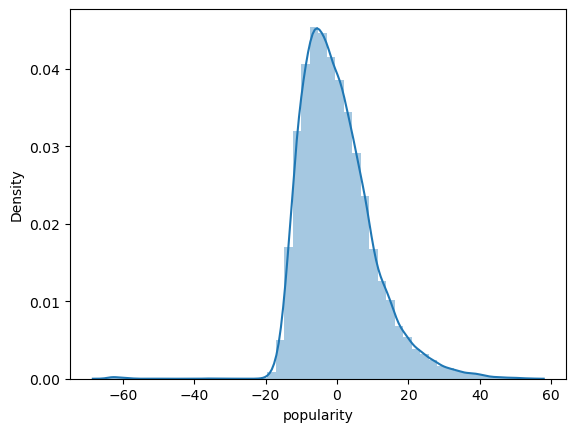

In [57]:
# Show the difference between the actual dependent feature vs the predicted dependent feature
sns.distplot(y_test-y_pred_5_1921_1999)

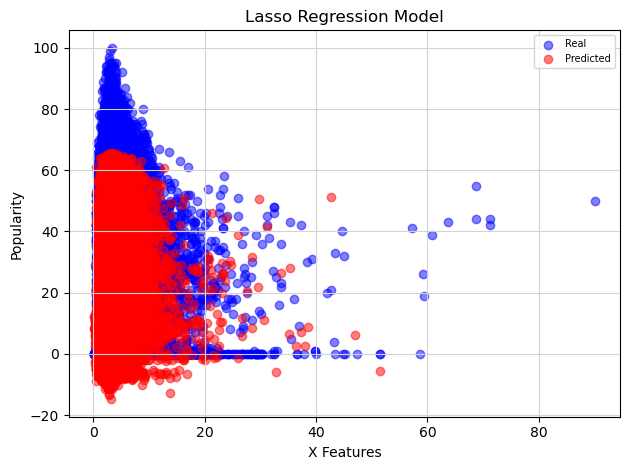

In [58]:
# Adjust X_train and X_test shape size as their current shapes differ, so they cannot be graphed.
#X_train_1=np.arange(0,len(X_train),1)
X_train_5_1921_1999 = X_train.iloc[:,0]
X_test_5_1921_1999 = X_test.iloc[:,0]

# Scatter plot for model_5_1921_1999
plt.scatter(X_train_5_1921_1999, y_train, label='Real', color='b', alpha=0.5)
plt.scatter(X_test_5_1921_1999, y_pred_5_1921_1999, label='Predicted', color='r', alpha=0.5)
plt.title('Lasso Regression Model')
plt.xlabel('X Features')
plt.ylabel('Popularity')
plt.grid(color='#D3D3D3', linestyle='solid')
plt.legend(fontsize=7, loc='upper right')
plt.tight_layout()
plt.show()

In [59]:
# Lasso for file_2000_2023_spotify dataframe
model_5_2000_2023 = Lasso()
#model_5_2000_2023 =  Lasso(warm_start=True, alpha=1e-40, max_iter=50)

# Tune model_5_2000_2023 to enhance model performance
hyperParameters_model_5_2000_2023 = {'alpha':[1e-100, 1e-75, 1e-40, 1e-25, 1e-5, 0],
                                     'warm_start':[True, False],
                                     'max_iter':[10, 30, 50]}
model_5_2000_2023 = GridSearchCV(model_5_2000_2023, hyperParameters_model_5_2000_2023,
                                 scoring='neg_mean_squared_error', cv=5)

# Fit model
model_5_2000_2023.fit(X_train2, y_train2)

# Predict the response for test dataset
y_pred_5_2000_2023 = model_5_2000_2023.predict(X_test2)

print('Mean Absolute Error (MAE):', format(metrics.mean_absolute_error(y_test2, y_pred_5_2000_2023), '.4f'))
print('Mean Squared Error (MSE):', format(metrics.mean_squared_error(y_test2, y_pred_5_2000_2023), '.4f'))
print('Root Mean Squared Error (RMSE):', format(metrics.mean_squared_error(y_test2, y_pred_5_2000_2023,
                                                                           squared=False), '.4f'))
print('Mean Absolute Percentage Error (MAPE):', format(metrics.mean_absolute_percentage_error(y_test2,
                                                                                y_pred_5_2000_2023), '.4f'))
print('R Squared:', format(metrics.r2_score(y_test2, y_pred_5_2000_2023), '.4f'))
print('Best value for alpha:', model_5_2000_2023.best_params_)

Mean Absolute Error (MAE): 11.6409
Mean Squared Error (MSE): 208.8842
Root Mean Squared Error (RMSE): 14.4528
Mean Absolute Percentage Error (MAPE): 9375453561314478.0000
R Squared: 0.1715
Best value for alpha: {'alpha': 1e-100, 'max_iter': 50, 'warm_start': True}


<Axes: xlabel='popularity', ylabel='Density'>

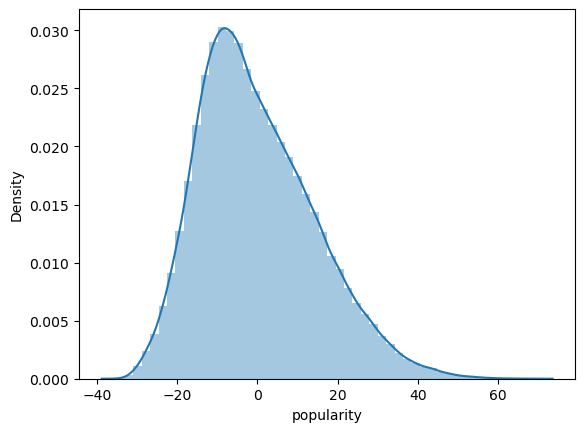

In [60]:
# Show the difference between the actual dependent feature vs the predicted dependent feature
sns.distplot(y_test2-y_pred_5_2000_2023)

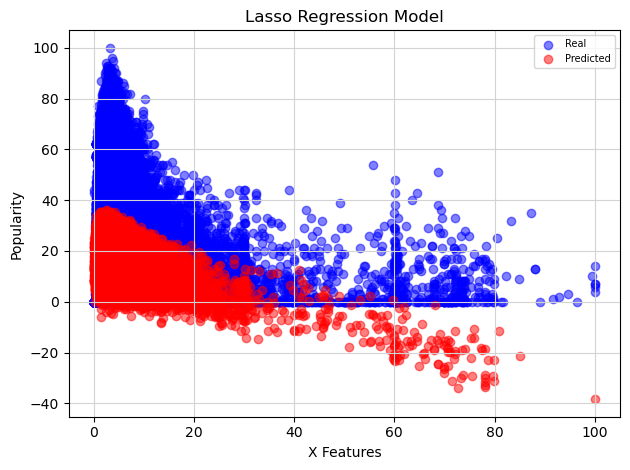

In [61]:
# Adjust X_train and X_test shape size as their current shapes differ, so they cannot be graphed.
X_train_5_2000_2023 = X_train2.iloc[:, 0]
X_test_5_2000_2023 = X_test2.iloc[:, 0]

# Scatter plot for model_5_2000_2023
plt.scatter(X_train_5_2000_2023, y_train2, label='Real', color='b', alpha=0.5)
plt.scatter(X_test_5_2000_2023, y_pred_5_2000_2023, label='Predicted', color='r', alpha=0.5)
plt.title('Lasso Regression Model')
plt.xlabel('X Features')
plt.ylabel('Popularity')
plt.grid(color='#D3D3D3', linestyle='solid')
plt.legend(fontsize=7, loc='upper right')
plt.tight_layout()
plt.show()

## XGB Regression

In [62]:
from xgboost import XGBRegressor

model_6_1921_1999 = XGBRegressor()
print(model_6_1921_1999.get_params())

{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [63]:
# XGBR for file_1921_1999_spotify dataframe
model_6_1921_1999 = XGBRegressor(objective='reg:squarederror', n_estimators=98, seed=123)

# Fit model
model_6_1921_1999.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_6_1921_1999 = model_6_1921_1999.predict(X_test)

print('Mean Absolute Error (MAE):', format(metrics.mean_absolute_error(y_test, y_pred_6_1921_1999), '.4f'))
print('Mean Squared Error (MSE):', format(metrics.mean_squared_error(y_test, y_pred_6_1921_1999), '.4f'))
print('Root Mean Squared Error (RMSE):', format(metrics.mean_squared_error(y_test, y_pred_6_1921_1999,
                                                                           squared=False), '.4f'))
print('Mean Absolute Percentage Error (MAPE):', format(metrics.mean_absolute_percentage_error(y_test,
                                                                               y_pred_6_1921_1999), '.4f'))
print('R Squared:', format(metrics.r2_score(y_test, y_pred_6_1921_1999), '.4f'))

Mean Absolute Error (MAE): 6.4628
Mean Squared Error (MSE): 81.2492
Root Mean Squared Error (RMSE): 9.0138
Mean Absolute Percentage Error (MAPE): 1444248409559338.2500
R Squared: 0.8260


<Axes: xlabel='popularity', ylabel='Density'>

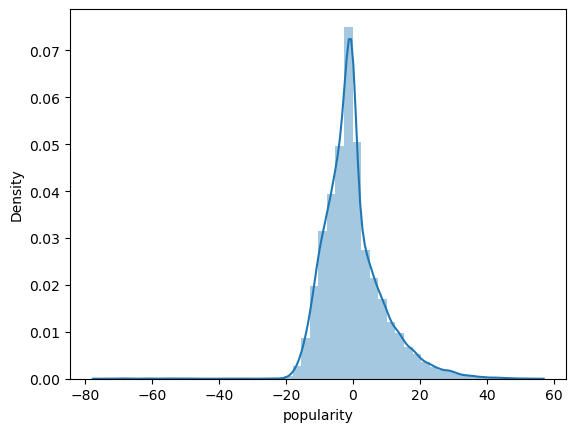

In [64]:
# Show the difference between the actual dependent feature vs the predicted dependent feature
sns.distplot(y_test-y_pred_6_1921_1999)

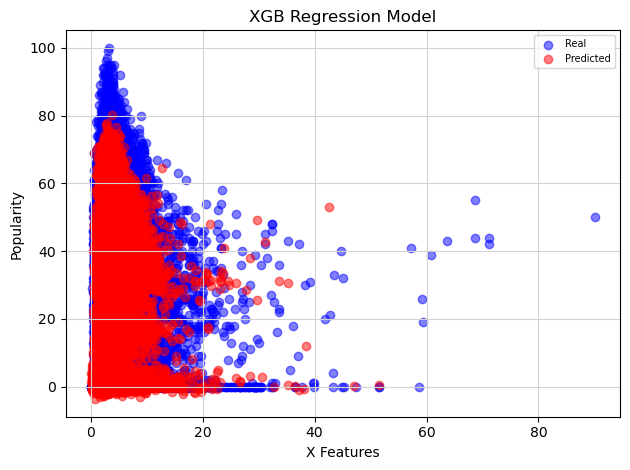

In [65]:
# Adjust X_train and X_test shape size as their current shapes differ, so they cannot be graphed.
#X_train_1=np.arange(0,len(X_train),1)
X_train_6_1921_1999 = X_train.iloc[:,0]
X_test_6_1921_1999 = X_test.iloc[:,0]

# Scatter plot for model_6_1921_1999
plt.scatter(X_train_6_1921_1999, y_train, label='Real', color='b', alpha=0.5)
plt.scatter(X_test_6_1921_1999, y_pred_6_1921_1999, label='Predicted', color='r', alpha=0.5)
plt.title('XGB Regression Model')
plt.xlabel('X Features')
plt.ylabel('Popularity')
plt.grid(color='#D3D3D3', linestyle='solid')
plt.legend(fontsize=7, loc='upper right')
plt.tight_layout()
plt.show()

In [66]:
# XGBR for file_2000_2023_spotify dataframe
#model_6_2000_2023 = XGBRegressor()
model_6_2000_2023 = XGBRegressor(objective='reg:squarederror', n_estimators=350, seed=123)

# Fit model
model_6_2000_2023.fit(X_train2, y_train2)

# Predict the response for test dataset
y_pred_6_2000_2023 = model_6_2000_2023.predict(X_test2)

print('Mean Absolute Error (MAE):', format(metrics.mean_absolute_error(y_test2, y_pred_6_2000_2023), '.4f'))
print('Mean Squared Error (MSE):', format(metrics.mean_squared_error(y_test2, y_pred_6_2000_2023), '.4f'))
print('Root Mean Squared Error (RMSE):', format(metrics.mean_squared_error(y_test2, y_pred_6_2000_2023,
                                                                           squared=False), '.4f'))
print('Mean Absolute Percentage Error (MAPE):', format(metrics.mean_absolute_percentage_error(y_test2,
                                                                                y_pred_6_2000_2023), '.4f'))
print('R Squared:', format(metrics.r2_score(y_test2, y_pred_6_2000_2023), '.4f'))

Mean Absolute Error (MAE): 10.3408
Mean Squared Error (MSE): 173.0217
Root Mean Squared Error (RMSE): 13.1538
Mean Absolute Percentage Error (MAPE): 7131983477509248.0000
R Squared: 0.3138


<Axes: xlabel='popularity', ylabel='Density'>

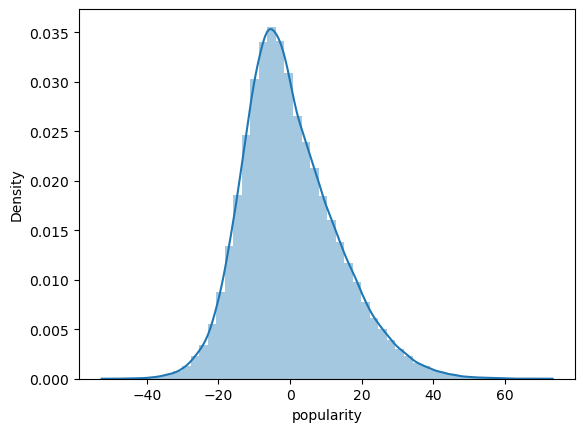

In [67]:
# Show the difference between the actual dependent feature vs the predicted dependent feature
sns.distplot(y_test2-y_pred_6_2000_2023)

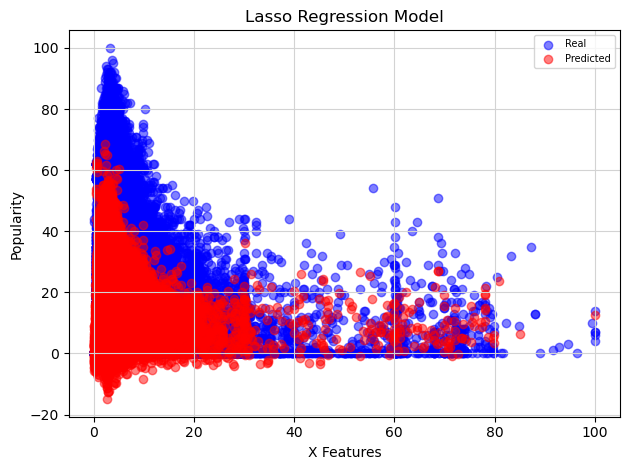

In [68]:
# Adjust X_train and X_test shape size as their current shapes differ, so they cannot be graphed.
X_train_6_2000_2023 = X_train2.iloc[:, 0]
X_test_6_2000_2023 = X_test2.iloc[:, 0]

# Scatter plot for model_5_2000_2023
plt.scatter(X_train_6_2000_2023, y_train2, label='Real', color='b', alpha=0.5)
plt.scatter(X_test_6_2000_2023, y_pred_6_2000_2023, label='Predicted', color='r', alpha=0.5)
plt.title('Lasso Regression Model')
plt.xlabel('X Features')
plt.ylabel('Popularity')
plt.grid(color='#D3D3D3', linestyle='solid')
plt.legend(fontsize=7, loc='upper right')
plt.tight_layout()
plt.show()

# Takeaways

Below are model performance results for the models tied to the file_1921_1999_spotify dataframe

Below are model performance results:
1. Random Forest (model_1_1921_1999)
    - Root Mean Squared Error (RMSE): Cannot complete due to lack of computing power
    - Mean Absolute Percentage Error (MAPE): Cannot complete due to lack of computing power
    - R Squared: Cannot complete due to lack of computing power
2. KNN Regression (model_2_1921_1999)
    - Root Mean Squared Error (RMSE): 9.35
    - Mean Absolute Percentage Error (MAPE): 1877512915325639.75
    - R Squared: 81.29%
3. Decision Tree (model_3_1921_1999)
    - Root Mean Squared Error (RMSE): 9.63
    - Mean Absolute Percentage Error (MAPE): 2025441916744209
    - R Squared: 80.15%
4. Linear Regression (model_4_1921_1999)
    - Root Mean Squared Error (RMSE): 10.09
    - Mean Absolute Percentage Error (MAPE): 4887416424252879
    - R Squared: 78.20%
5. Lasso Regression (model_5_1921_1999)
    - Root Mean Squared Error (RMSE): 10.09
    - Mean Absolute Percentage Error (MAPE): 4886728042833569
    - R Squared: 78.20%
6. XGB Regression (model_6_1921_1999)
    - Root Mean Squared Error (RMSE): 9.01
    - Mean Absolute Percentage Error (MAPE): 1444248409559338.25
    - R Squared: 82.60%
    
The XGB Regression model performed the best, so it will be leveraged.

Below are model performance results for the models tied to the file_2000_2023_spotify dataframe

Below are model performance results:
1. Random Forest (model_1_2000_2023)
    - Root Mean Squared Error (RMSE): Cannot complete due to lack of computing power
    - Mean Absolute Percentage Error (MAPE): Cannot complete due to lack of computing power
    - R Squared: Cannot complete due to lack of computing power
2. KNN Regression (model_2_2000_2023)
    - Root Mean Squared Error (RMSE): 14.26
    - Mean Absolute Percentage Error (MAPE): 8958822157789828
    - R Squared: 19.37%
3. Decision Tree (model_3_2000_2023)
    - Root Mean Squared Error (RMSE): Cannot complete due to lack of computing power
    - Mean Absolute Percentage Error (MAPE): Cannot complete due to lack of computing power
    - R Squared: % Cannot complete due to lack of computing power
4. Linear Regression (model_4_2000_2023)
    - Root Mean Squared Error (RMSE): 14.45
    - Mean Absolute Percentage Error (MAPE): 9375453561387142
    - R Squared: 17.15%
5. Lasso Regression (model_5_2000_2023)
    - Root Mean Squared Error (RMSE): 14.45
    - Mean Absolute Percentage Error (MAPE): 9375453561387940
    - R Squared: 17.15%
6. XGB Regression (model_6_2000_2023)
    - Root Mean Squared Error (RMSE): 13.15
    - Mean Absolute Percentage Error (MAPE): 7131983477509248
    - R Squared: 31.38%
    
While the performance of all models underwhelmed relative to overall expectations, the XGB Regression model performed the best, so it will be leveraged.